# Project: Wrangling WeRateDogs Twitter Archive Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessment">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storage">Data Storage</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

In [2]:
# Importing the required packages
import requests
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>
## Data Gathering

In [3]:
# Loading the twitter-archive-enhanced dataset
twitter_enhanced_archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_enhanced_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> In the above section, we have loaded the dataset of the WeRateDogs Twitter archive which was downloaded manually  from the Udacity Webpage: twitter-archive-enhanced-2.csv. We later displayed to first 5 rows to get and understand the actual structure of the data in the dataset.

In [156]:
# Displaying the shape (Dimensions) of the twitter_enhanced_archive dataframe
twitter_enhanced_archive_df.shape

(2356, 17)

According the above, the archive contains 2356 rows of tweets and 17 columns

<h5>Image Predictions</h5>
In the following section we are downloading the Image predictions programmatically from <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</a> with the Requests Library.

This file provides information about the different classifications of the breeds of dogs. The predictions in particular include the top three breeds only for each tweet Id, image URL and the image number that corresponded with the most confident prediction

In [5]:
# Downloading the predictions of the images from the Udacity website
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

In [6]:
# Read and save the file
file_name = image_predictions_url.split('/')[-1]
with open(os.path.join('./', file_name), mode = 'wb') as file:
    file.write(response.content)

> In the above section we have used the requests library to fetch the image predictions from the Udacity Website. We later saved the result of the request to the 'image-predictions.tsv' with the help of the os library

In [7]:
image_predictions_df = pd.read_csv(file_name, sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_predictions_df.shape

(2075, 12)

> In the above sections, We loaded the image predictions dataset, We also displayed to first 5 rows to get a clear structure of the dataset. We later displayed the shape of the dataset which showed that the it contains 2075 rows and 12 columns

In [10]:
# Getting the unique tweet_ids for tweepy data query
tweet_id_unique = np.union1d(twitter_enhanced_archive_df.tweet_id.unique(), image_predictions_df.tweet_id.unique())
tweet_id_unique.size

2356

<h5>Twitter API Data</h5>
In the following section, We are using the Tweepy Library to query the WeRateDogs Twitter archive data. This data is going to be saved in the tweet_json.txt file which will be used to create a dataframe.

In [11]:
# Installing tweepy
%pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import tweepy

bearer_token = ''

# Authenticating with Bearer token
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

# Getting a list of tweet_id from the twitter_enhanced_archive dataframe
tweet_ids = twitter_enhanced_archive_df.tweet_id.values
len(tweet_ids)
count = 0
failed_tweets = {}
with open('tweet_json.txt', 'w') as tweets_file:
    for tweet_id in tweet_ids:
        try: 
            count += 1
            print(str(count) + ": " + str(tweet_id))
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            # Get the structure of the first query response
            # if(count == 1):
            #    print(tweet)
            json.dump(tweet._json, tweets_file)
            # create a new line
            tweets_file.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail: " + str(tweet_id) + " => " + str(e))
            failed_tweets[tweet_id] = e
            pass


1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail: 888202515573088257 => 404 Not Found
144 - No status found with that ID.
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 8845628

299: 837012587749474308
Fail: 837012587749474308 => 404 Not Found
144 - No status found with that ID.
300: 836989968035819520
301: 836753516572119041
302: 836677758902222849
303: 836648853927522308
304: 836397794269200385
305: 836380477523124226
306: 836260088725786625
307: 836001077879255040
308: 835685285446955009
309: 835574547218894849
310: 835536468978302976
311: 835309094223372289
312: 835297930240217089
313: 835264098648616962
314: 835246439529840640
315: 835172783151792128
316: 835152434251116546
317: 834931633769889797
318: 834786237630337024
319: 834574053763584002
320: 834477809192075265
321: 834458053273591808
322: 834209720923721728
323: 834167344700198914
324: 834089966724603904
325: 834086379323871233
326: 833863086058651648
327: 833826103416520705
328: 833732339549220864
329: 833722901757046785
330: 833479644947025920
331: 833124694597443584
332: 832998151111966721
333: 832769181346996225
334: 832757312314028032
335: 832682457690300417
336: 832645525019123713
337: 83263

625: 795464331001561088
626: 795400264262053889
627: 795076730285391872
628: 794983741416415232
629: 794926597468000259
630: 794355576146903043
631: 794332329137291264
632: 794205286408003585
633: 793962221541933056
634: 793845145112371200
635: 793614319594401792
636: 793601777308463104
637: 793500921481273345
638: 793286476301799424
639: 793271401113350145
640: 793256262322548741
641: 793241302385262592
642: 793226087023144960
643: 793210959003287553
644: 793195938047070209
645: 793180763617361921
646: 793165685325201412
647: 793150605191548928
648: 793135492858580992
649: 793120401413079041
650: 792913359805018113
651: 792883833364439040
652: 792773781206999040
653: 792394556390137856
654: 792050063153438720
655: 791821351946420224
656: 791784077045166082
657: 791780927877898241
658: 791774931465953280
659: 791672322847637504
660: 791406955684368384
661: 791312159183634433
662: 791026214425268224
663: 790987426131050500
664: 790946055508652032
665: 790723298204217344
666: 79069875517

940: 753039830821511168
941: 753026973505581056
942: 752932432744185856
943: 752917284578922496
944: 752701944171524096
945: 752682090207055872
946: 752660715232722944
947: 752568224206688256
948: 752519690950500352
949: 752334515931054080
950: 752309394570878976
951: 752173152931807232
952: 751950017322246144
953: 751937170840121344
954: 751830394383790080
955: 751793661361422336
956: 751598357617971201
957: 751583847268179968
958: 751538714308972544
959: 751456908746354688
960: 751251247299190784
961: 751205363882532864
962: 751132876104687617
963: 750868782890057730
964: 750719632563142656
965: 750506206503038976
966: 750429297815552001
967: 750383411068534784
968: 750381685133418496
969: 750147208377409536
970: 750132105863102464
971: 750117059602808832
972: 750101899009982464
973: 750086836815486976
974: 750071704093859840
975: 750056684286914561
976: 750041628174217216
977: 750026558547456000
978: 750011400160841729
979: 749996283729883136
980: 749981277374128128
981: 74977419042

1271: 709449600415961088
1272: 709409458133323776
1273: 709225125749587968
1274: 709207347839836162
1275: 709198395643068416
1276: 709179584944730112
1277: 709158332880297985
1278: 709042156699303936
1279: 708853462201716736
1280: 708845821941387268
1281: 708834316713893888
1282: 708810915978854401
Fail: 708810915978854401 => 429 Too Many Requests
88 - Rate limit exceeded
1283: 708738143638450176
Fail: 708738143638450176 => 429 Too Many Requests
88 - Rate limit exceeded
1284: 708711088997666817
Fail: 708711088997666817 => 429 Too Many Requests
88 - Rate limit exceeded
1285: 708479650088034305
Fail: 708479650088034305 => 429 Too Many Requests
88 - Rate limit exceeded
1286: 708469915515297792
Fail: 708469915515297792 => 429 Too Many Requests
88 - Rate limit exceeded
1287: 708400866336894977
Fail: 708400866336894977 => 429 Too Many Requests
88 - Rate limit exceeded
1288: 708356463048204288
Fail: 708356463048204288 => 429 Too Many Requests
88 - Rate limit exceeded
1289: 708349470027751425


1449: 696405997980676096
1450: 696100768806522880
1451: 695816827381944320
1452: 695794761660297217
1453: 695767669421768709
1454: 695629776980148225
1455: 695446424020918272
1456: 695409464418041856
1457: 695314793360662529
1458: 695095422348574720
1459: 695074328191332352
1460: 695064344191721472
1461: 695051054296211456
1462: 694925794720792577
1463: 694905863685980160
1464: 694669722378485760
1465: 694356675654983680
1466: 694352839993344000
1467: 694342028726001664
1468: 694329668942569472
1469: 694206574471057408
1470: 694183373896572928
1471: 694001791655137281
1472: 693993230313091072
1473: 693942351086120961
1474: 693647888581312512
1475: 693644216740769793
1476: 693642232151285760
1477: 693629975228977152
1478: 693622659251335168
1479: 693590843962331137
1480: 693582294167244802
1481: 693486665285931008
1482: 693280720173801472
1483: 693267061318012928
1484: 693262851218264065
1485: 693231807727280129
1486: 693155686491000832
1487: 693109034023534592
1488: 693095443459342336


1774: 678255464182861824
1775: 678023323247357953
1776: 678021115718029313
1777: 677961670166224897
1778: 677918531514703872
1779: 677895101218201600
1780: 677716515794329600
1781: 677700003327029250
1782: 677698403548192770
1783: 677687604918272002
1784: 677673981332312066
1785: 677662372920729601
1786: 677644091929329666
1787: 677573743309385728
1788: 677565715327688705
1789: 677557565589463040
1790: 677547928504967168
1791: 677530072887205888
1792: 677335745548390400
1793: 677334615166730240
1794: 677331501395156992
1795: 677328882937298944
1796: 677314812125323265
1797: 677301033169788928
1798: 677269281705472000
1799: 677228873407442944
1800: 677187300187611136
1801: 676975532580409345
1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848


2102: 670691627984359425
2103: 670679630144274432
2104: 670676092097810432
2105: 670668383499735048
2106: 670474236058800128
2107: 670468609693655041
2108: 670465786746662913
2109: 670452855871037440
2110: 670449342516494336
2111: 670444955656130560
2112: 670442337873600512
2113: 670435821946826752
2114: 670434127938719744
2115: 670433248821026816
2116: 670428280563085312
2117: 670427002554466305
2118: 670421925039075328
2119: 670420569653809152
2120: 670417414769758208
2121: 670411370698022913
2122: 670408998013820928
2123: 670403879788544000
2124: 670385711116361728
2125: 670374371102445568
2126: 670361874861563904
2127: 670338931251150849
2128: 670319130621435904
2129: 670303360680108032
2130: 670290420111441920
2131: 670093938074779648
2132: 670086499208155136
2133: 670079681849372674
2134: 670073503555706880
2135: 670069087419133954
2136: 670061506722140161
2137: 670055038660800512
2138: 670046952931721218
2139: 670040295598354432
2140: 670037189829525505
2141: 670003130994700288


Fail: 667369227918143488 => 429 Too Many Requests
88 - Rate limit exceeded
2283: 667211855547486208
Fail: 667211855547486208 => 429 Too Many Requests
88 - Rate limit exceeded
2284: 667200525029539841
Fail: 667200525029539841 => 429 Too Many Requests
88 - Rate limit exceeded
2285: 667192066997374976
Fail: 667192066997374976 => 429 Too Many Requests
88 - Rate limit exceeded
2286: 667188689915760640
Fail: 667188689915760640 => 429 Too Many Requests
88 - Rate limit exceeded
2287: 667182792070062081
Fail: 667182792070062081 => 429 Too Many Requests
88 - Rate limit exceeded
2288: 667177989038297088
Fail: 667177989038297088 => 429 Too Many Requests
88 - Rate limit exceeded
2289: 667176164155375616
Fail: 667176164155375616 => 429 Too Many Requests
88 - Rate limit exceeded
2290: 667174963120574464
Fail: 667174963120574464 => 429 Too Many Requests
88 - Rate limit exceeded
2291: 667171260800061440
Fail: 667171260800061440 => 429 Too Many Requests
88 - Rate limit exceeded
2292: 667165590075940865


In [27]:
print(len(failed_tweets))

148


> From the above section, we were able to query and save the results in the tweet_json.txt file. However, this operation gained some fails (errors) which accounted to 148 which were as a result of "Too many requests" and Not Found statuses with IDs

In [12]:
# Reading line by line of the tweets_json stored in the tweets_json.txt
selected_attr = []
with open('tweet_json.txt', 'r') as tweets_txt_file:
    for line in tweets_txt_file:
        json_data = json.loads(line)
        
        # creating a dictionary with the tweet_id, favorites, retweets from the JSON data and
        # appending it to the selected_attr
        selected_attr.append({'tweet_id': json_data['id'], 
                              'favorite_count': json_data['favorite_count'], 
                              'retweet_count': json_data['retweet_count']})
        

tweets_df = pd.DataFrame(selected_attr, columns=['tweet_id', 'favorite_count', 'retweet_count'])

In [13]:
tweets_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33695,6969
1,892177421306343426,29222,5272
2,891815181378084864,21978,3464
3,891689557279858688,36788,7191
4,891327558926688256,35182,7715


In [14]:
# Getting the shape of the data
tweets_df.shape

(2208, 3)

In [15]:
# Storing the result
tweets_df.to_csv('tweet_json.csv', index=False)

In [17]:
tweets_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.208000e+03,2208.000000,2208.000000
mean,7.448929e+17,7270.587862,2539.800725
std,6.851587e+16,11099.910551,4235.788930
min,6.660209e+17,0.000000,1.000000
25%,6.797346e+17,1299.750000,520.000000
50%,7.288735e+17,3198.000000,1232.000000
75%,8.013486e+17,9018.000000,2940.250000
max,8.924206e+17,144249.000000,70332.000000


<a id='assessment'></a>
## Data Assessment

In this section we assess the data collected previously for Quality and Tidiness issues.

Quality issues are issues regarding the contents of the data. They include the duplicates, NaN values, Inconsistent and Incorrect data types. While;
Tidiness issues are those regarding the structure of the data. These issues slow down the Cleaning, Analysis and modeling of the data.

#### The Twitter Enhanced Archive Data

In [18]:
# Loadding the first rows of the Enhanced twitter archive
twitter_enhanced_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
twitter_enhanced_archive_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# Descriptive information of the Enhanced Twitter dataset
twitter_enhanced_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [159]:
twitter_enhanced_archive_df.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

> From the above information, The Enhanced Twitter archive dataset has 2356 rows and 17 columns. It is also seen that from the Descriptive information of the dataset, the min rating numerator is 0 while the maximum is 1776. The average rating numerator is 13.126486 and the average for the rating denominator is 10.455433.
>- Some of the columns like; in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have a lot of null values.
>- Incorrect DataTypes for columns like the timestamp is sited
>- A lot of dogs have None values in their dog types columns
>- Some of the dogs have incorrect rating values
>- It should also be noted that from the visual assessment, Columns such as 'doggo', 'floofer', 'pupper', 'puppo' should be grouped in a single column which may be named as 'dog stage'
>- The dataset also contain retweets which need to be removed for a better analysis
>- Some of the urls in the expanded_urls contain duplicates

In [21]:
twitter_enhanced_archive_df['name'].value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

#### The Image Prediction Dataset

In [22]:
# Loading first rows
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_predictions_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# Evaluating the number of dogs that pass the first confidence level
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
# Evaluating those dogs that pass the second confidence level
image_predictions_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
# Evaluating the number that passes the third confidence level
image_predictions_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

> From the above information, the Image predictions dataset contains 2075 rows and 12 columns however, the following issues were identified;
>- The total number of tweets within the enhanced twitter archive is 2356 which does not match with the 2075 records in the image predictions dataframe.
>- The columns p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog can be grouped into one column called confidence level


### Assessment Summary
#### Quality Issues
>- <a href="#issue-1">[Issue #1]</a> Incorrect data type for columns like timestamp in Enhanced archive.
>- <a href="#issue-2">[Issue #2]</a> There are some tweets dated 2016 in the Enhanced archive while the image_predictions cover for tweets of 2017
>- <a href="#issue-5">[Issue #5]</a> Incorrect rating denominator for some of the dogs in the Enhanced archive data
>- <a href="#issue-6">[Issue #6]</a> Columns in Enhanced archive like doggo, floofer, pupper, and puppo have None values. This can be changed to NaN.
>- <a href="#issue-8">[Issue #8]</a> The tweet_id column is misrepresented as integer in all the three datasets
>- The number of rows in Enhanced archive do not match with those in the image predictions
>- <a href="#issue-9">[Issue #9]</a> 745 dogs names have value None while some of the dogs have incorrect names
>- Columns with retweets information have a lot of null values with only 181 non-null
>- Columns with Replies information have a lot of null values

#### Tidiness Issues
>- <a href="#issue-3">[Issue #3]</a> The Enhanced archive Dataset contains retweets identified with retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp which need to be removed for better analysis
>- <a href="#issue-4">[Issue #4]</a> The Enhanced archive Dataset also contains replies which can be identified with in_reply_to_status_id, in_reply_to_user_id 
>- <a href="#issue-6">[Issue #6]</a> Columns doggo, floofer, pupper and puppo need to be merged into one column named dog_stage
>- Some of the expanded urls rows in the archive dataset contain more than 1 url
>- <a href="#issue-7">[Issue #7]</a> The enhanced archive contains unnecessary columns
>- Image predictions contains unnecessary columns
>- <a href="#issue-10">[Issue #10]</a> Inconsistent capitalization of names in p1, p2, and p3 in the image predictions dataset
>- <a href="#issue-11">[Issue #11]</a> Too many datasets. These can be merged into one dataset for manageability
>- Non-logical names are used in the enhanced archive dataset such as a, one, not, such
>- The image predictions columns p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog can be grouped into one column called confidence level



<a id='cleaning'></a>
## Cleaning

In the following section we, shall be cleaning our datasets for a properly structured data to gain insights with the visualizations

In [118]:
# Duplicating the datasets
enhanced_archive_df_clean = twitter_enhanced_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweets_df_clean = tweets_df.copy()

> In the above section we have duplicated the datasets to avoid messing with the original datasets.



<a id='issue-1'></a>
### Issue #1
<b> Incorrect data type for timestamp column in Enhanced archive</b>

#### Define
In the following section we are converting the timestamp column in the enhanced archive from object to datetime using the pandas to_datatime function

#### Code

In [119]:
# Converting the timestamp to datatime datatype
enhanced_archive_df_clean.timestamp = pd.to_datetime(enhanced_archive_df_clean.timestamp)

#### Test

In [120]:
# Verifying the data type of the timestamp
enhanced_archive_df_clean.timestamp.dtype

datetime64[ns, UTC]

<a id='issue-2'></a>
### Issue #2
<b>There are some tweets dated 2016 in the Enhanced archive while the image_predictions cover for tweets of 2017</b>

#### Define
In the following section we are going to filter tweets dated before 2017 in both enhanced archive and the tweets_json dataframes. This is going to be done with the help of the pd.drop function

#### Code

In [121]:
below_2017 = enhanced_archive_df_clean[enhanced_archive_df_clean.timestamp.dt.year != 2017]
enhanced_archive_df_clean.drop(below_2017.index, inplace=True)

#### Test

In [122]:
# Verifying the above operation
enhanced_archive_df_clean[enhanced_archive_df_clean.timestamp.dt.year != 2017]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<a id='issue-3'></a>
### Issue #3 
<b>The Enhanced archive Dataset contains retweets</b> 

#### Define
In the following section we shall be remove retweets rows hence these will be rows that are not null in the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. This is done by identifying tweets whose retweeted_status_id is not null

#### Code

In [123]:
# Selecting columns with retweets
retweets = enhanced_archive_df_clean.loc[enhanced_archive_df_clean['retweeted_status_id'].notnull()]
# Dropping the rows
enhanced_archive_df_clean = enhanced_archive_df_clean.drop(retweets.index, axis=0)

#### Test

In [124]:
# Verifying action
enhanced_archive_df_clean.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 482
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    399 non-null    int64              
 1   in_reply_to_status_id       24 non-null     float64            
 2   in_reply_to_user_id         24 non-null     float64            
 3   timestamp                   399 non-null    datetime64[ns, UTC]
 4   source                      399 non-null    object             
 5   text                        399 non-null    object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               377 non-null    object             
 10  rating_numerator            399 non-null    int64             

<a id='issue-4'></a>
### Issue #4
<b>The Enhanced archive Dataset also contains replies</b> 

#### Define
In the following section we shall be remove replies rows hence these will be rows that are not null in the in_reply_to_status_id, in_reply_to_user_id. This is done by identifying tweets whose in_reply_to_status_id is not null

#### Code

In [125]:
# Selecting columns with replies
replies = enhanced_archive_df_clean.loc[enhanced_archive_df_clean['in_reply_to_status_id'].notnull()]
# Dropping the rows
enhanced_archive_df_clean = enhanced_archive_df_clean.drop(replies.index, axis=0)

#### Test

In [126]:
enhanced_archive_df_clean.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 482
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    375 non-null    int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   375 non-null    datetime64[ns, UTC]
 4   source                      375 non-null    object             
 5   text                        375 non-null    object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               374 non-null    object             
 10  rating_numerator            375 non-null    int64             

<a id='issue-5'></a>
### Issue #5
<b>Incorrect rating denominator for some of the dogs in the Enhanced archive data</b> 

#### Define
In the following section we shall be remove all rows with rating_denominator not equal to 10 or not divisible by 10

#### Code

In [116]:
# Displaying rating denominators
# enhanced_archive_df_clean.rating_denominator.value_counts().sort_index()denominator_rows = enhanced_archive_df_clean[enhanced_archive_df_clean['rating_denominator'] != 10]
# df = twitter_enhanced_archive_df.copy()
# denominator_rows = df[df['rating_denominator'] % 10 != 0]

# denominator_rows

In [127]:
# Selecting rating denominator no equal to 10 rows
denominator_rows = enhanced_archive_df_clean[enhanced_archive_df_clean['rating_denominator'] % 10 != 0]
# Dropping selected rows
enhanced_archive_df_clean = enhanced_archive_df_clean.drop(denominator_rows.index, axis=0)

#### Test

In [128]:
# Verifying drop results
enhanced_archive_df_clean.rating_denominator.value_counts()

10    374
70      1
Name: rating_denominator, dtype: int64

<!-- <b>Issue: Drop greater Rating numerator</b> In the following section we shall be remove all rows with rating_numerator greater than 15 -->

In [47]:
# Displaying rating numerators
# enhanced_archive_df_clean.rating_numerator.value_counts().sort_index()

In [48]:
# Selecting rating numerator greater than 15 rows
# numerator_rows = enhanced_archive_df_clean[enhanced_archive_df_clean['rating_numerator'] >= 15]
# Dropping selected rows
# enhanced_archive_df_clean = enhanced_archive_df_clean.drop(numerator_rows.index, axis=0)

In [49]:
# Verifying previous action
# enhanced_archive_df_clean.rating_numerator.value_counts().sort_index()

<a id='issue-6'></a>
### Issue #6
<b>Combine Dog stage columns and correct inconsitences</b> 

#### Define
In the following section we shall;
<ul>
    <li>Replace the missing values with NaN </li>
    <li>combine doggo,floofer, puppo, pupper to form dog stage column</li>
    <li>Drop the four columns</li>
</ul>

#### Code

In [129]:
# Describing the structure of the stages
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo'];
enhanced_archive_df_clean[stage_columns].describe()

,doggo,floofer,pupper,puppo
count,375,375,375,375
unique,2,2,2,2
top,None,None,None,None
freq,342,373,353,364


In [130]:
# Replacing None value with a blank space in the four columns
enhanced_archive_df_clean['doggo'].replace('None', '', inplace=True)
enhanced_archive_df_clean['floofer'].replace('None', '', inplace=True)
enhanced_archive_df_clean['pupper'].replace('None', '', inplace=True)
enhanced_archive_df_clean['puppo'].replace('None', '', inplace=True)

# Creating a new 'dog_stage' column
enhanced_archive_df_clean['dog_stage'] = enhanced_archive_df_clean['doggo'] + enhanced_archive_df_clean['floofer'] + enhanced_archive_df_clean['pupper'] + enhanced_archive_df_clean['puppo']

# describing the dog_stage column
enhanced_archive_df_clean['dog_stage'].describe()

count     375
unique      8
top          
freq      310
Name: dog_stage, dtype: object

In [131]:
enhanced_archive_df_clean['dog_stage'].value_counts()

                310
doggo            30
pupper           21
puppo            10
doggofloofer      1
floofer           1
doggopuppo        1
doggopupper       1
Name: dog_stage, dtype: int64

From the above information we have 11 dogs that belong to atleast two stages i.e. 9 in doggopupper, 1 in doggofloofer and 1 in doggopuppo. We also have 1740 dogs uncategorized

In [132]:
# Replacing blank stages with NaN
enhanced_archive_df_clean.loc[enhanced_archive_df_clean.dog_stage == '', 'dog_stage'] = np.nan
# Filling NaN values with unknown value
# enhanced_archive_df_clean['dog_stage'] = enhanced_archive_df_clean['dog_stage'].fillna(np.nap)

In the following section we are separating the dogs that belong to atleast two stages

In [133]:
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo'];

# Defining regex pattern to handle the stage filteration
reg_pattern = r"(?=(\b" + '|'.join(stage_columns) + r"\b))"
enhanced_archive_df_clean['dog_stage'] = enhanced_archive_df_clean.dog_stage.str.findall(reg_pattern).str.join(',').replace({'': np.nan})

In [134]:
# Setting the data type of the dog stage column to category
enhanced_archive_df_clean.dog_stage = enhanced_archive_df_clean.dog_stage.astype('category')

In [135]:
# Dropping the four stage columns
drop_col_list = ['doggo', 'floofer', 'pupper', 'puppo']
enhanced_archive_df_clean = enhanced_archive_df_clean.drop(drop_col_list, axis=1)

#### Test

In [136]:
# Verifying dog stages
enhanced_archive_df_clean['dog_stage'].value_counts()

doggo            30
pupper           21
puppo            10
floofer           1
doggo,puppo       1
doggo,pupper      1
doggo,floofer     1
Name: dog_stage, dtype: int64

In [138]:
# Verifying table structure
enhanced_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 482
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    375 non-null    int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   375 non-null    datetime64[ns, UTC]
 4   source                      375 non-null    object             
 5   text                        375 non-null    object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               374 non-null    object             
 10  rating_numerator            375 non-null    int64             

In [140]:
# verifying null values
enhanced_archive_df_clean.dog_stage.isnull().value_counts()

True     310
False     65
Name: dog_stage, dtype: int64

<a id='issue-7'></a>
### Issue #7
<b>The Enhanced archive dataset contains unnecessary columns</b> 

#### Define
In the following section we shall drop unnecessary columns in the twitter enhanced archive dataset

#### Code

In [141]:
enhanced_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 482
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    375 non-null    int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   375 non-null    datetime64[ns, UTC]
 4   source                      375 non-null    object             
 5   text                        375 non-null    object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               374 non-null    object             
 10  rating_numerator            375 non-null    int64             

In [142]:
drop_col_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
enhanced_archive_df_clean = enhanced_archive_df_clean.drop(drop_col_list, axis=1)

#### Test

In [143]:
# Verifying available columns
list(enhanced_archive_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

<a id='issue-8'></a>
### Issue #8
<b>The tweet_id column is misrepresented as integer in all the three datasets</b>

#### Define

In the following section we are going to convert the tweet_id to string datatype 

#### Code

In [144]:
enhanced_archive_df_clean.tweet_id = enhanced_archive_df_clean.tweet_id.astype(str)
image_predictions_df_clean.tweet_id = image_predictions_df_clean.tweet_id.astype(str)
tweets_df_clean.tweet_id = tweets_df_clean.tweet_id.astype(str)

#### Test

In [145]:
# Verifying the above operation
enhanced_archive_df_clean.tweet_id.dtype
image_predictions_df_clean.tweet_id.dtype
tweets_df_clean.tweet_id.dtype

dtype('O')

<a id='issue-9'></a>
### Issue #9
<b>745 dogs names in the Enhanced archive dataset are misrepresented as None </b>

#### Define

In the following section we are going to replace None in the enhanced archive name column with NaN

#### Code

In [146]:
enhanced_archive_df_clean.name = enhanced_archive_df_clean.name.replace("None", np.nan)

#### Test

In [147]:
# Verifying the above operation
enhanced_archive_df_clean[enhanced_archive_df_clean.name.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
24,887343217045368832,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,NaN
25,887101392804085760,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
444,819238181065359361,2017-01-11 17:42:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,NaN,pupper
458,817908911860748288,2017-01-08 01:40:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Looks like he went cross-eyed trying way too h...,https://twitter.com/micahgrimes/status/8179020...,12,10,NaN,NaN
467,817120970343411712,2017-01-05 21:29:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,https://twitter.com/dog_rates/status/817120970...,13,10,NaN,NaN
478,815966073409433600,2017-01-02 17:00:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,https://twitter.com/dog_rates/status/815966073...,13,10,NaN,pupper


<a id='issue-10'></a>
### Issue #10
<b>Inconsistent capitalization of names in p1, p2, and p3 in the image predictions dataset</b>

#### Define
In the following section, we are going to use the capitalize function to capitalize every first letter in the columns

#### Code

In [149]:
breed_columns = ['p1', 'p2', 'p3']
image_predictions_df_clean[breed_columns] = image_predictions_df_clean[breed_columns].apply(lambda x: x.str.capitalize())

#### Test

In [150]:
# Verifying if the required changes occured
image_predictions_df_clean[~image_predictions_df_clean.p1.apply(lambda x: x[0].isupper())]
image_predictions_df_clean[~image_predictions_df_clean.p2.apply(lambda x: x[0].isupper())]
image_predictions_df_clean[~image_predictions_df_clean.p3.apply(lambda x: x[0].isupper())]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<a id='issue-11'></a>
### Issue #11
<b>Merge the Enhanced twitter archive dataset with the image predictions dataset</b>

#### Define
In the following section, we are merging the Enhanced twitter archive table with the image predictions table to form a new twitter_archive_master

#### Code

In [151]:
twitter_archive_master = pd.merge(enhanced_archive_df_clean, image_predictions_df_clean, on='tweet_id')

#### Test

In [152]:
# Verifying the new dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            354 non-null    object             
 1   timestamp           354 non-null    datetime64[ns, UTC]
 2   source              354 non-null    object             
 3   text                354 non-null    object             
 4   expanded_urls       354 non-null    object             
 5   rating_numerator    354 non-null    int64              
 6   rating_denominator  354 non-null    int64              
 7   name                289 non-null    object             
 8   dog_stage           62 non-null     category           
 9   jpg_url             354 non-null    object             
 10  img_num             354 non-null    int64              
 11  p1                  354 non-null    object             
 12  p1_conf             354 non-null    

<a id='issue-12'></a>
### Issue #12
<b> Merging the tweet_json table with the new twitter_archive_master</b>

#### Define
We are merging the tweet_json table together with the newly create twitter_archive_master using pandas merge function

#### Code

In [153]:
twitter_archive_master = pd.merge(twitter_archive_master, tweets_df_clean, on='tweet_id', how='inner')

#### Test

In [154]:
# verify structure
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            350 non-null    object             
 1   timestamp           350 non-null    datetime64[ns, UTC]
 2   source              350 non-null    object             
 3   text                350 non-null    object             
 4   expanded_urls       350 non-null    object             
 5   rating_numerator    350 non-null    int64              
 6   rating_denominator  350 non-null    int64              
 7   name                285 non-null    object             
 8   dog_stage           61 non-null     category           
 9   jpg_url             350 non-null    object             
 10  img_num             350 non-null    int64              
 11  p1                  350 non-null    object             
 12  p1_conf             350 non-null    

In [155]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,33695,6969
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29222,5272
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,21978,3464
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,36788,7191
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35182,7715


<!-- ### Issue #13
<b>Some of the expanded urls rows in the archive dataset contain more than 1 url</b>

#### Define
We are going to 

#### Code -->

<a id='storage'></a>
## Storing Data
In the next section we are storing the newly merged dataframe to twitter_archive_master.csv

In [160]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What is the rating distribution?

In [162]:
# Investigating the rating distribution of the dataset based on the rating_numerator
twitter_archive_master['rating_numerator'].value_counts().sort_index(ascending=False)

84      1
14     24
13    156
12    128
11     35
10      3
6       1
5       1
0       1
Name: rating_numerator, dtype: int64

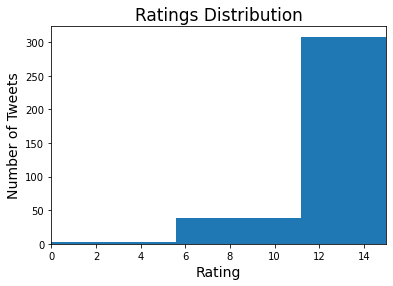

In [166]:
twitter_archive_master['rating_numerator'].plot(kind='hist', bins=15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize='14')
plt.xlabel('Rating', fontsize='14')
plt.title('Ratings Distribution', size=17)
# save image for later report processing
plt.savefig('rating_distribution.png')

In [167]:
# Getting a descriptive information of the new dataset
twitter_archive_master.rating_numerator.describe()

count    350.000000
mean      12.600000
std        4.000716
min        0.000000
25%       12.000000
50%       13.000000
75%       13.000000
max       84.000000
Name: rating_numerator, dtype: float64

> From the above information, 50% and 75% of the rating is at 13.0

### Question 2: What are the common stages?

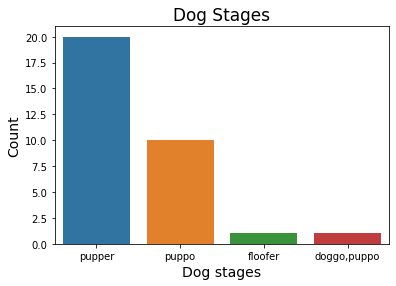

In [168]:
dog_stages = twitter_archive_master.dog_stage.value_counts()[1:5].index
sns.countplot(data=twitter_archive_master, x='dog_stage', order=dog_stages)
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Dog Stages', fontsize=17)
# save the image for later
plt.savefig('dog-stages.png')

> From the above information 'pupper' stage is most classified dog stage

### Question 3: What is the correlation between Retweets and Favorites counts?

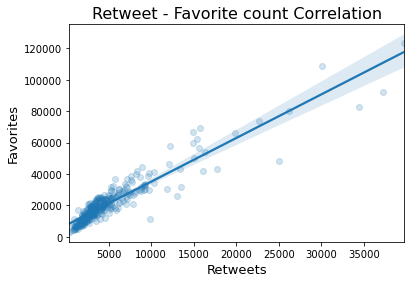

In [169]:
sns.regplot(x='retweet_count', y='favorite_count', data=twitter_archive_master, scatter_kws={'alpha': 0.2})
plt.title('Retweet - Favorite count Correlation', size=16)
plt.xlabel('Retweets', size=13)
plt.ylabel('Favorites', size=13)
# Saving image for later
plt.savefig('correlation.png')

> From the above information is evident that the more the retweets, the more it gets visible and hence the higher the favorites count

<a id='conclusions'></a>
## Conclusions

I have really enjoyed working on this project, it has exposed me to a lot of use case scenarios, data handling methods among others. Interesting conclusions have been made from this analysis as listed below.
<ul>
<li> The more the retweets, the more it gets visible and hence the higher the favorites counts</li>
<li> 'pupper' stage is most classified dog stage </li>
</ul>

<a id='limitations'></a>
## Limitations
Below are some of the limitations experienced in making this analysis
<ul>
<li>Given the limited time, a partial assessment and cleaning was carried out on the datasets. More work can be done to make the final dataset cleaner</li>
<li>A partial analysis also made, deeper analysis and visualizations can be drawn from the dataset</li>
<li>The querying of the data from the Twitter api returned errors to some of the tweet Ids, this might have altered the final outcome of the process</li>
</ul>